In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('homeprices_banglore.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [3]:
df.sample(5)

,area,bedrooms,price
2,1440,3,62.0
5,1170,2,38.0
9,3700,5,167.0
1,2600,4,120.0
10,1800,3,82.0


In [5]:
# Scaling data
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [6]:
scaled_Y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_Y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [ ]:
# Bath gradient descent function

def batch_gradient_descent(X,y_true, epochs, learning_rate=0.5):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        y_predicted = np.dot(w, scaled_X.T) + b
        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.mean(np.square((y_true-y_predicted)))

        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    
    return w,b,cost_list,epoch_list


In [10]:
w,b,cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_Y.reshape(scaled_Y.shape[0],),500)

In [11]:
w,b,cost_list, epoch_list

(array([0.91329689, 0.2142067 ]),
 np.float64(-0.07638774454920315),
 [np.float64(0.2768777174681),
  np.float64(0.006660725969160603),
  np.float64(0.004810485222306515),
  np.float64(0.00438288072890199),
  np.float64(0.004161110814567767),
  np.float64(0.003987803533124624),
  np.float64(0.003840053813601274),
  np.float64(0.003712366061751448),
  np.float64(0.0036017942830819097),
  np.float64(0.0035060160228240892),
  np.float64(0.0034230484801486783),
  np.float64(0.0033511777210783363),
  np.float64(0.003288919510596646),
  np.float64(0.003234988185252222),
  np.float64(0.0031882700433776496),
  np.float64(0.0031478003391289602),
  np.float64(0.0031127433591862483),
  np.float64(0.0030823751648642395),
  np.float64(0.003056068642514213),
  np.float64(0.0030332805534096937),
  np.float64(0.0030135403156798246),
  np.float64(0.002996440286631996),
  np.float64(0.002981627344790161),
  np.float64(0.002968795597815),
  np.float64(0.00295768006572201),
  np.float64(0.0029480512089537

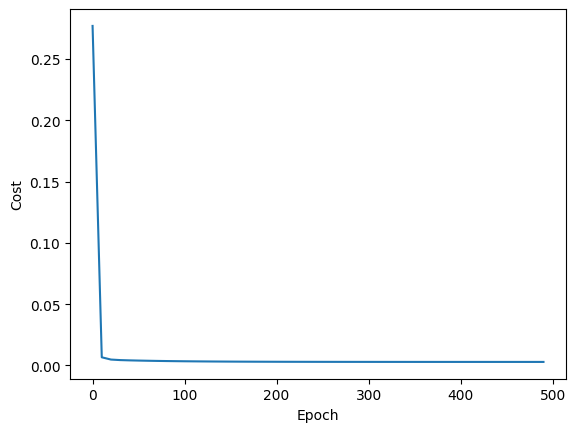

In [12]:
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.plot(epoch_list, cost_list)

In [18]:
def predict(area,bedrooms, w, b):
    scaled_X = sx.transform([[area,bedrooms]])[0]
    scaled_price = w[0]*scaled_X[0] + w[1]*scaled_X[1] + b
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

/media/rahul/280284fc-cb1d-4540-9515-36b722236c05/deeplearning/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(119.904063409011)

In [19]:
predict(1000,2,w,b)

/media/rahul/280284fc-cb1d-4540-9515-36b722236c05/deeplearning/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(37.42023948175417)

In [20]:
# Stochastic Gradient Descent
import random
def stochastic_gradient_descent(X, y_true, epochs, learning_rate=0.01):
    number_of_features = X.shape[1]
    w=np.ones(shape=(number_of_features))
    b=0
    total_samples=X.shape[0]

    cost_list=[]
    epoch_list=[]

    for i in range(epochs):
        random_index = random.randint(0,total_samples-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        y_predicted = np.dot(w, sample_x.T) + b

        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.square(sample_y-y_predicted)

        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost_list, epoch_list

In [33]:
w_sgd ,b_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_Y.reshape(scaled_Y.shape[0],),10000)

In [34]:
w_sgd ,b_sgd, cost_list_sgd, epoch_list_sgd

(array([0.70546427, 0.67345165]),
 np.float64(-0.2324399971262157),
 [np.float64(0.3000465022207216),
  np.float64(0.8064655943759849),
  np.float64(0.26599424522479675),
  np.float64(0.0660157687051658),
  np.float64(0.20343690558703892),
  np.float64(0.38717265726886224),
  np.float64(0.03894012092039877),
  np.float64(0.022656191051091318),
  np.float64(0.00012486531392597115),
  np.float64(0.08022520335777332),
  np.float64(0.0006162606640970407),
  np.float64(0.0369203542945226),
  np.float64(0.0016791245654419944),
  np.float64(0.008083278192328985),
  np.float64(0.0175870499404348),
  np.float64(0.018306911459520347),
  np.float64(0.015562035275708156),
  np.float64(0.012834006044678777),
  np.float64(0.015385087819853047),
  np.float64(0.08946978912504105),
  np.float64(0.002244626739984338),
  np.float64(0.009490913658440157),
  np.float64(0.002619915673982188),
  np.float64(0.008416586326421172),
  np.float64(0.09359355137414489),
  np.float64(0.008399349846302752),
  np.floa

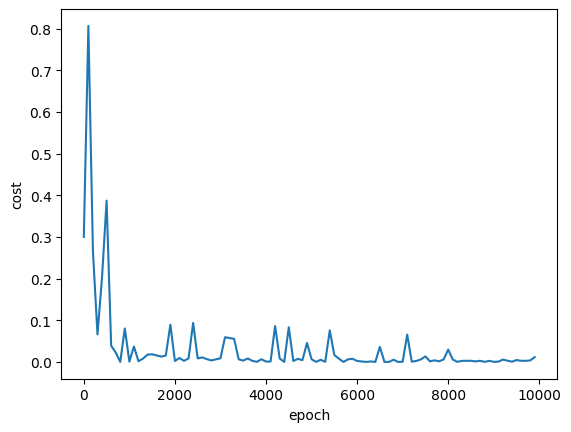

In [35]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd, cost_list_sgd)